GD_Iteration:  758
run Gardient Descent Time: 2.8024920259999817
GD_SteepestSize Maximum: [[3.5615]] Inv(Q)@b Maximum: [[4.62709298]]
CG_Iteration:  45
run CG Time: 0.25873918899969794
CG Maximum: [[4.62469956]] Inv(Q)@b Maximum: [[4.62709298]]
QN_Iteration:  44
run QN Time: 5.1181729609998
QN Maximum: [[4.62701157]] Inv(Q)@b Maximum: [[4.62709298]]


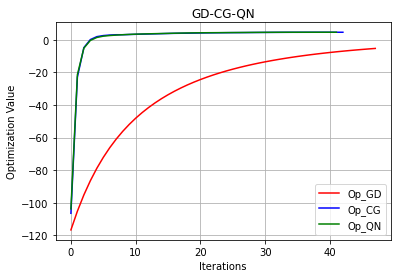

In [85]:
#Gradient Ascent, CG, QN with Steepest size(Random Matrix Quadratic function)
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import timeit
n = 1000
A = np.random.rand(n,n)
Q = (A.T + A)
minEig = min(LA.eig(Q)[0])
if minEig<=0:
    Q = Q + -(minEig-0.1)*np.identity(n)
b = np.random.rand(n,1)
def f(x):
    y = -1/2*(x.T@Q@x) + b.T@x
    return y

def grad_f(x):
    g = -Q@x + b
    return g

def GD(n):
    start1 = timeit.default_timer()
    eps0 = 1e-3
    stepsize = 1e-1
    stop=False
    itera_GD = 0
    x0 = np.random.rand(n,1)
    x_GD = np.random.rand(n,1)
    Op_GD = np.random.rand(n,1)
    
    while not stop:
        g = grad_f(x0)
        Op_GD[itera_GD] = f(x0)
        stepsize = (g.T@g)/(g.T@Q@g)#steepest size
        x_GD = x0 + stepsize*g
        if np.linalg.norm(x_GD-x0)/np.linalg.norm(x0)<eps0:
            stop=True
            break
        x0 =x_GD
        itera_GD+=1
    stop1 = timeit.default_timer()
    print("GD_Iteration: ", itera_GD)
    print("run Gardient Descent Time:", stop1 - start1)
    plt.plot(Op_GD[2:50],color="r",label="Op_GD")
    plt.title("GD-CG-QN-NT")
    return x_GD

def CG(n):
    start2 = timeit.default_timer()
    eps0 = 1e-3
    stepsize = 1e-1
    stop=False
    itera_CG = 0
    beta = 0
    x0 = np.random.rand(n,1)
    x_CG = np.zeros((n,1))
    Op_CG = np.zeros((n,1))
    g=grad_f(x0)
    g_up = np.zeros((n,1))
    d=g
    d_up = np.zeros((n,1))

    while not stop:
        Op_CG[itera_CG] = f(x0)
        stepsize = (g.T@d)/(d.T@Q@d)
        x_CG = x0 + stepsize*d
        g_up=grad_f(x_CG)
        beta = (g_up.T@Q@d)/(d.T@Q@d)
        d_up = g_up-beta*d
        d=d_up
        g=g_up
        if np.linalg.norm(x_CG-x0)/np.linalg.norm(x0)<eps0:
            stop=True
            break
        x0 =x_CG
        itera_CG+=1
    stop2 = timeit.default_timer()
    print("CG_Iteration: ", itera_CG)
    print("run CG Time:", stop2 - start2)
    plt.plot(Op_CG[2:itera_CG],color="b",label="Op_CG")
    plt.title("GD-CG-QN-NT")
    return x_CG

def QN(n):
    start3 = timeit.default_timer()
    eps0 = 1e-3
    stepsize = 1e-1
    stop=False
    itera_QN = 0
    eps0 = 1e-3

    x0 = np.random.rand(n,1)
    x_QN = np.zeros((n,1))
    Op_QN = np.random.rand(n,1)
    d = np.zeros((n,1))
    H0 = np.identity(n) 
    H_up = np.identity(n)
    g = np.zeros((n,1))
    g_up = np.zeros((n,1))
    s = np.zeros((n,1))#delta theta
    y = np.zeros((n,1))#delta gradient

    while not stop:
        Op_QN[itera_QN] = f(x0)
        g = grad_f(x0)
        d = H0@g
        stepsize = (g.T@d)/(d.T@Q@d)
        x_QN = x0 + stepsize*d
        s = x_QN-x0
        g_up = grad_f(x_QN)
        y = g_up-g
        H = (np.identity(n)-(s@y.T)/(s.T@y))@H0@(np.identity(n)-(y@s.T)/(s.T@y))+(s@s.T)/(s.T@y)
        if np.linalg.norm(x_QN-x0)/np.linalg.norm(x0)<eps0 or np.linalg.norm(g_up)==0:
            stop=True
            break
        x0 = x_QN
        H0 = H
        itera_QN+=1    
    stop3 = timeit.default_timer()
    print("QN_Iteration: ", itera_QN)
    print("run QN Time:", stop3 - start3)
    plt.plot(Op_QN[2:itera_QN],color="g",label="Op_QN")
    plt.title("GD-CG-QN")
    return x_QN
    
print("GD_SteepestSize Maximum:", f(GD(n)),"Inv(Q)@b Maximum:",f(np.linalg.inv(Q)@b))
print("============================")
print("CG Maximum:", f(CG(n)),"Inv(Q)@b Maximum:",f(np.linalg.inv(Q)@b))
print("============================")
print("QN Maximum:", f(QN(n)),"Inv(Q)@b Maximum:",f(np.linalg.inv(Q)@b))
plt.ylabel("Optimization Value")
plt.xlabel("Iterations")
plt.legend()
plt.grid()
plt.show()